In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Central Limit Theorem
a = 1
b = 100
N = 10000

# create 10000 samples between 1 and 100 of a uniform distribution
DataPop = list(np.random.uniform(a,b,N))

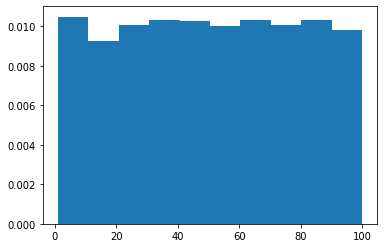

In [3]:
# plot the distribution - should be fairly evenly distributed
plt.hist(DataPop, density = True)
plt.show()

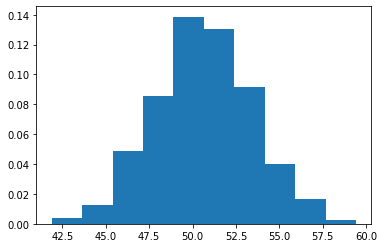

In [4]:
# get 1000 random samples with size = 100 and calculate their means
SampleMeans_list = []
for i in range(1000):
    SampleData = random.sample(DataPop, k = 100)
    SampleMean = np.mean(SampleData)
    SampleMeans_list.append(SampleMean)

# plot the distribution of the sample means - should be closer to normal
plt.figure()
plt.hist(SampleMeans_list, density = True)
plt.show()
    

In [ ]:
# Numerical Integration using Monte Carlo Simulation

# idea is that the definite integral is the area under a curve and between the x-axis
# we can create a rectangle with the width = to the bounds of integration 
# and height = max function value in the given interval
# then plot a bunch of points in the rectangle
# we will calculate whether each random point is above or below the curve
# find the probability (ratio) of points below the curve out of the total rectangle
# thus, the area = value of definite integral which is approximately probability

In [5]:
import math
import scipy.integrate

In [22]:
random.seed()
# define the function
def f(x):
    y = x**2
    return(y)
a = 0.0
b = 1.0

NumSteps = 100000
# store points that are under the curve
x_int = []
y_int = []
# store points that are above the curve
x_rect = []
y_rect = []


In [23]:
# get min and max of the function for the rectangle?
ymin = f(a)
ymax = ymin

for i in range(NumSteps):
    # move along the x-axis starting at x = a in steps of 1/NumSteps (tiny intervals)
    x = a + (b-a)*i/NumSteps
    y = f(x)
    if y < ymin:
        ymin = y
    if y > ymax:
        ymax = y

In [24]:
# monte carlo method - plot a bunch of random points

# get size/area of the rectangle = Width * height
A = (b - a) * (ymax - 0)
# total number of points
N = 1000000
# number of points under the curve
M = 0

for i in range(N):
    # get random - random.random gives numbers between 0 and 1. 
    # Start at a and then add some percentage of the width
    x = a + (b - a) * random.random()
    # Start at ymin and then add some percentage of the height
    y = 0 + (ymax) * random.random()
    # where should they go?
    if y <= f(x): # under the curve?
        M += 1 # count a point under the curve
        x_int.append(x)
        y_int.append(y)
    else: # above the curve
        x_rect.append(x)
        y_rect.append(y)
        
round(M/N*A,5)

0.33313

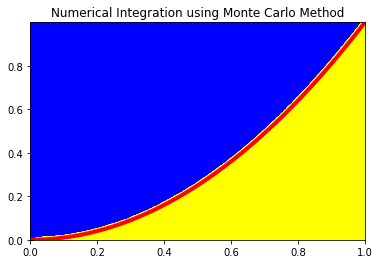

In [25]:
x_lin = np.linspace(a,b)
y_lin = []
for x in x_lin:
    y_lin.append(f(x))

plt.axis([a, b, 0, ymax])
plt.plot(x_lin, y_lin, color = 'red', linewidth = '4')
plt.scatter(x_rect, y_rect, color = 'blue')
plt.scatter(x_int, y_int, color = 'yellow')
plt.title('Numerical Integration using Monte Carlo Method')
plt.show()

In [26]:
# actual value
actual = scipy.integrate.quad(f,0,1)[0]
approx = M/N*A

In [27]:
# calculate relative and percent error
rel = np.abs(actual - approx)
per = rel/actual * 100
print('Relative Error:', round(rel,6))
print('Percent Error:', round(per,4),'%')

Relative Error: 0.000204
Percent Error: 0.0612 %
